In [4]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [6]:
#Carga de dataset
data = pd.read_csv('/content/stats_BVG_latest.csv')

In [7]:
print(data)

                                              Emisores  Valor Nominal  \
0                                          Meriza S.A.            1.0   
1                              Rio Congo Forestal C.A.            1.0   
2                                 El Tecal C.A. ELTECA            1.0   
3                  La Reserva Forestal (Reforest S.A.)            1.0   
4                Cerro Verde Forestal (Bigforest S.A.)            1.0   
..                                                 ...            ...   
679                           Banco del Pichincha C.A.          100.0   
680                               Banco Solidario S.A.            1.0   
681  Corp. Desarrollo Mercado Secundario Hipotecas ...            1.0   
682                                     Produbanco S.A            1.0   
683                                Inversancarlos S.A.            1.0   

     Último Precio P/U  Veces  P/VL  Capitalización D/P  Yield  \
0          40.0000    (25.71)  0.84         3200000      

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Emisores            684 non-null    object 
 1   Valor Nominal       684 non-null    float64
 2   Último Precio       684 non-null    float64
 3   P/U  Veces          684 non-null    object 
 4   P/VL                684 non-null    float64
 5   Capitalización      684 non-null    int64  
 6   D/P  Yield          684 non-null    object 
 7   Presencia Bursátil  684 non-null    object 
 8   Índice de Rotación  684 non-null    float64
 9   Líquidez            684 non-null    object 
 10  Fecha               684 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 58.9+ KB


In [10]:
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [11]:
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [12]:
print(data)

     Emisores  Valor Nominal  Último Precio  P/U  Veces  P/VL  Capitalización  \
0          30            1.0        40.0000           1  0.84         3200000   
1          32            1.0        40.0000           6  0.83         3600000   
2          17            1.0        35.0000           0  0.76         3150000   
3          27            1.0        32.7300           2  0.80         2945700   
4           9            1.0        31.9100           9  0.81         3191000   
..        ...            ...            ...         ...   ...             ...   
679         6          100.0        76.0000          33  0.47       551496964   
680         4            1.0         0.2600          36  0.59        78663670   
681        12            1.0         2.8968          45  1.22         9439335   
682        31            1.0         0.7100          31  0.51       215733500   
683        21            1.0         1.6500          47  1.36        90750000   

     D/P  Yield  Presencia 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Emisores            684 non-null    int64  
 1   Valor Nominal       684 non-null    float64
 2   Último Precio       684 non-null    float64
 3   P/U  Veces          684 non-null    int64  
 4   P/VL                684 non-null    float64
 5   Capitalización      684 non-null    int64  
 6   D/P  Yield          684 non-null    int64  
 7   Presencia Bursátil  684 non-null    int64  
 8   Índice de Rotación  684 non-null    float64
 9   Líquidez            684 non-null    int64  
 10  Fecha               684 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 58.9 KB


In [16]:
# Lectura de Datos
columnas_seleccionadas = list(range(0, 2)) + list(range(3, 11))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 2]
m = y.size

In [18]:
print(X)
print('*'*25)
print(y)

     Emisores  Valor Nominal  P/U  Veces  P/VL  Capitalización  D/P  Yield  \
0          30            1.0           1  0.84         3200000           0   
1          32            1.0           6  0.83         3600000           1   
2          17            1.0           0  0.76         3150000           0   
3          27            1.0           2  0.80         2945700           0   
4           9            1.0           9  0.81         3191000           2   
..        ...            ...         ...   ...             ...         ...   
679         6          100.0          33  0.47       551496964          26   
680         4            1.0          36  0.59        78663670          36   
681        12            1.0          45  1.22         9439335           6   
682        31            1.0          31  0.51       215733500          29   
683        21            1.0          47  1.36        90750000           5   

     Presencia Bursátil  Índice de Rotación  Líquidez  Fecha  


In [19]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [20]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Emisores  Valor Nominal  P/U  Veces  P/VL  Capitalización  D/P  Yield  \
0          30            1.0           1  0.84         3200000           0   
1          32            1.0           6  0.83         3600000           1   
2          17            1.0           0  0.76         3150000           0   
3          27            1.0           2  0.80         2945700           0   
4           9            1.0           9  0.81         3191000           2   
..        ...            ...         ...   ...             ...         ...   
679         6          100.0          33  0.47       551496964          26   
680         4            1.0          36  0.59        78663670          36   
681        12            1.0          45  1.22         9439335           6   
682        31            1.0          31  0.51       215733500          29   
683        21            1.0          47  1.36        90750000           5   

     Presencia Bursátil  Índice de Rotación  Líquidez  Fecha  


In [21]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [22]:
print(X)

[[ 1.          1.20327738 -0.17075006 ... -0.46863554 -1.50755672
  -1.60488413]
 [ 1.          1.39580176 -0.17075006 ... -0.08690254  0.66332496
  -1.60488413]
 [ 1.         -0.0481311  -0.17075006 ... -0.11551756  0.66332496
  -1.60488413]
 ...
 [ 1.         -0.52944205 -0.17075006 ... -0.54567342  0.66332496
   1.69688386]
 [ 1.          1.29953957 -0.17075006 ... -0.56952758  0.66332496
   1.69688386]
 [ 1.          0.33691767 -0.17075006 ...  0.05530846  0.66332496
   1.69688386]]


In [23]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [24]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [25]:
print(X)

[[ 1.          1.20327738 -0.17075006 ... -0.46863554 -1.50755672
  -1.60488413]
 [ 1.          1.39580176 -0.17075006 ... -0.08690254  0.66332496
  -1.60488413]
 [ 1.         -0.0481311  -0.17075006 ... -0.11551756  0.66332496
  -1.60488413]
 ...
 [ 1.         -0.52944205 -0.17075006 ... -0.54567342  0.66332496
   1.69688386]
 [ 1.          1.29953957 -0.17075006 ... -0.56952758  0.66332496
   1.69688386]
 [ 1.          0.33691767 -0.17075006 ...  0.05530846  0.66332496
   1.69688386]]


theta calculado por el descenso por el gradiente: [15.61482682  0.23275251 11.67695493 -5.06779102  7.26607849  2.44550507
 -2.57053306 -0.3702163   0.07295844  0.04644855 -0.05879827]
El valor predecido es (usando el descenso por el gradiente): 20.0757


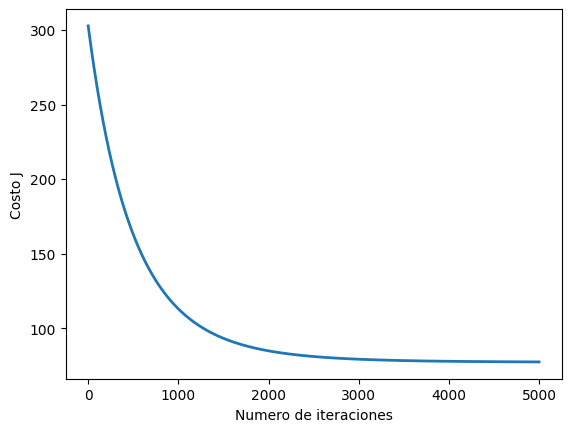

In [35]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un auto Ford en distintas caracteristicas
X_array = [1, 27, 1.0, 2, 0.80, 2945700, 0, 3, 0.545000,1,0]
X_array[1:11] = (X_array[1:11] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))